In [1]:
import numpy as np
import pandas as pd

In [2]:
df_advert=pd.read_csv('Advertising.csv')

In [3]:
df_advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df_advert.shape

(200, 4)

In [5]:
# Finding missing values
df_advert.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

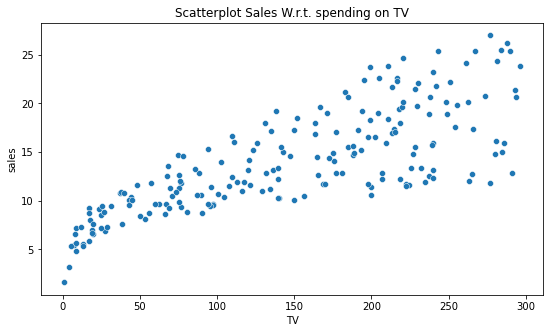

In [6]:
# use scatterplot to see relationship b/w features(independent) & target variables(dependent)
# relationship b/w Tv & sales
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(9,5))
sb.scatterplot(data=df_advert,x='TV',y='sales')
plt.title('Scatterplot Sales W.r.t. spending on TV')
plt.show()

In [7]:
df_advert[['sales','TV']].corr()

,sales,TV
sales,1.000000,0.782224
TV,0.782224,1.000000


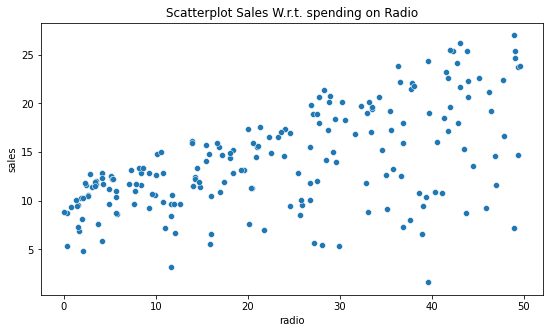

In [8]:
# relationship b/w Radio & sales
plt.figure(figsize=(9,5))
sb.scatterplot(data=df_advert,x='radio',y='sales')
plt.title('Scatterplot Sales W.r.t. spending on Radio')
plt.show()

In [9]:
df_advert[['sales','radio']].corr()

,sales,radio
sales,1.000000,0.576223
radio,0.576223,1.000000


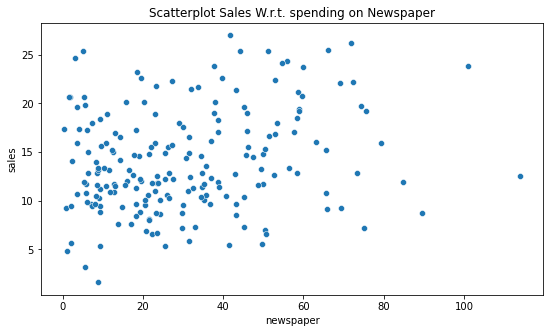

In [10]:
# relationship b/w Newspaper & sales
plt.figure(figsize=(9,5))
sb.scatterplot(data=df_advert,x='newspaper',y='sales')
plt.title('Scatterplot Sales W.r.t. spending on Newspaper')
plt.show()

In [11]:
df_advert[['sales','newspaper']].corr()

,sales,newspaper
sales,1.000000,0.228299
newspaper,0.228299,1.000000


# Build Regression Models

## Linear Regression Model

In [12]:
# import stats api library
import statsmodels.formula.api as smf

In [13]:
# ols(ordinary least squares) method identifies the best fit line of the target variable
# the best fit line is based on the simple linear regression equation y=mx+c where x is independent
# the formula is y ~ x according to y = mx+c 
# build a model for sales to Tv
sm_sales_tv_model=smf.ols(formula='sales ~ TV',data=df_advert).fit()

In [14]:
print(sm_sales_tv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        10:59:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [15]:
# build a model for sales to Radio
sm_sales_radio_model=smf.ols(formula='sales ~ radio',data=df_advert).fit()

In [16]:
print(sm_sales_radio_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           4.35e-19
Time:                        10:59:08   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

In [17]:
# build a model for sales to Newspaper
sm_sales_newspaper_model=smf.ols(formula='sales ~ newspaper',data=df_advert).fit()

In [18]:
print(sm_sales_newspaper_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 25 Jan 2022   Prob (F-statistic):            0.00115
Time:                        10:59:08   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

In [19]:
# we found out that spending on Tv advertisements generates more sales.
# Hence, sales = 0.0475* TV + 7.0326 is the best fit line / best fit Model

## Multiple Regression Model

In [20]:
# build a model for sales in combination with TV & Radio
sm_sales_tv_rd_model=smf.ols(formula='sales ~ TV + radio',data=df_advert).fit()

In [21]:
print(sm_sales_tv_rd_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           4.83e-98
Time:                        10:59:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [22]:
# build a model for sales in combination with TV, Radio, Newspaper
sm_sales_tv_rd_np_model=smf.ols(formula='sales ~ TV + radio + newspaper',data=df_advert).fit()

In [23]:
print(sm_sales_tv_rd_np_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        10:59:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [24]:
# sales = 2.9389 + 0.0458*TV + 0.1885*radio - 0.0010*newspaper
# since the newspaper advertisement spending generates loss this is not the best fit model
# Hence sales = 2.9389 + 0.0458*TV + 0.1885*radio is the best fit model

In [25]:
# predict the model i.e. predict the sales by the best fit model
y_pred=sm_sales_tv_rd_model.predict()

In [26]:
# check the accuracy of the predicted model/ check for errors
# the less the value of RMSE better the model is
from sklearn.metrics import mean_squared_error as mse

In [27]:
MSE=mse(y_pred,df_advert['sales'])

In [28]:
MSE

2.784569900338092

In [29]:
Root_Mean_squared_error=mse(y_pred,df_advert['sales'],squared=False)

In [30]:
Root_Mean_squared_error

1.668703059366193

In [31]:
# mean absolute error is another measure of checking errors
from sklearn.metrics import mean_absolute_error as mae

In [32]:
abs_error=mae(y_pred,df_advert['sales'])

In [33]:
abs_error

1.2537471644234015

### Split the data into Training & testing sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=df_advert[['TV','radio']]
y=df_advert['sales']

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.7,random_state=12345)

In [37]:
# total records
print(df_advert.shape)

(200, 4)


In [38]:
# Training records
print(xtrain.shape)

(140, 2)


In [39]:
# Testing records
print(xtest.shape)

(60, 2)


In [40]:
# standard scaling of the Features / Z-score / Standardization
# Z score transforms the mean into 0 & standard deviation to 1
from sklearn.preprocessing import StandardScaler

In [41]:
# instanciate an object of standardscaler class
scaler=StandardScaler()

In [42]:
# scale the training dataset
xtrain_scaled=scaler.fit_transform(xtrain)

In [43]:
# scale the testing dataset
xtest_scaled=scaler.transform(xtest)

## Build a Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression

In [51]:
# instantiate an object of LinearRegression class
linReg=LinearRegression()

In [52]:
# Train the model with the scaled features
linReg.fit(xtrain_scaled,ytrain)

LinearRegression()

In [53]:
# see the coefficient / slope of the prediction line
linReg.coef_

array([3.63494395, 2.69965172])

In [54]:
# see the intercept of the prediction line with Y axis
linReg.intercept_

13.872857142857145

In [55]:
# predict the training dataset with the scaled features
y_train_pred=linReg.predict(xtrain_scaled)

In [56]:
y_train_pred[0:5]

array([ 8.39392945,  9.50532415, 12.10252974, 16.79833102, 11.64123793])

In [58]:
# predict the testing dataset with the scaled features
y_test_pred=linReg.predict(xtest_scaled)

In [59]:
y_test_pred[0:5]

array([20.46206382, 10.13636589, 14.10095105,  9.68634163,  8.84089385])

## Accuracy check

In [60]:
from sklearn.metrics import mean_squared_error as mse

In [62]:
# check RMSE for the training set
RMSE_train=mse(y_train_pred,ytrain,squared=False)

In [63]:
RMSE_train

1.5062905432887084

In [64]:
# check RMSE for the testing set
RMSE_test=mse(y_test_pred,ytest,squared=False)

In [65]:
RMSE_test

2.029402913983898

In [66]:
# The model is performing relatively well in both the Training as well as the Testing set

In [67]:
from sklearn.metrics import r2_score

In [69]:
# check the R square value of the training dataset
Rsquared_train=r2_score(y_train_pred,ytrain)
Rsquared_train

0.8885880771620198

In [70]:
# check the R square value of the testing dataset
Rsquared_test=r2_score(y_test_pred,ytest)
Rsquared_test

0.8483159881864237